In [47]:
# Standard libraries
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

# Enable auto-reload for module reloading during development
%load_ext autoreload
%autoreload 2

# Set display options for Pandas to show all columns
pd.set_option('display.max_columns', None)

# Load custom scripts
import scp.data_check as ch


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load dataset
assets = pd.read_csv('dataset/king_country_houses_aa.csv')

In [3]:
# First look at the first few rows of the dataset
assets.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# Check data types, number of missing values, duplicates, and unique values
ch.check(assets)

Number of columns: 21 and rows: 21613

Data types:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Unique values count:
id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             

In [35]:
# Copy of the data
df = assets.copy()

In [36]:
# Looking for correlations with the target
df = df.drop(columns=["date"])
correlation_with_price = df.corrwith(df["price"]).sort_values(ascending=False)
correlation_with_price

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
dtype: float64

In [37]:
df = df[[col for col in df.columns if col != 'price'] + ['price']]

Text(0.5, 1.0, 'Correlation Heatmap')

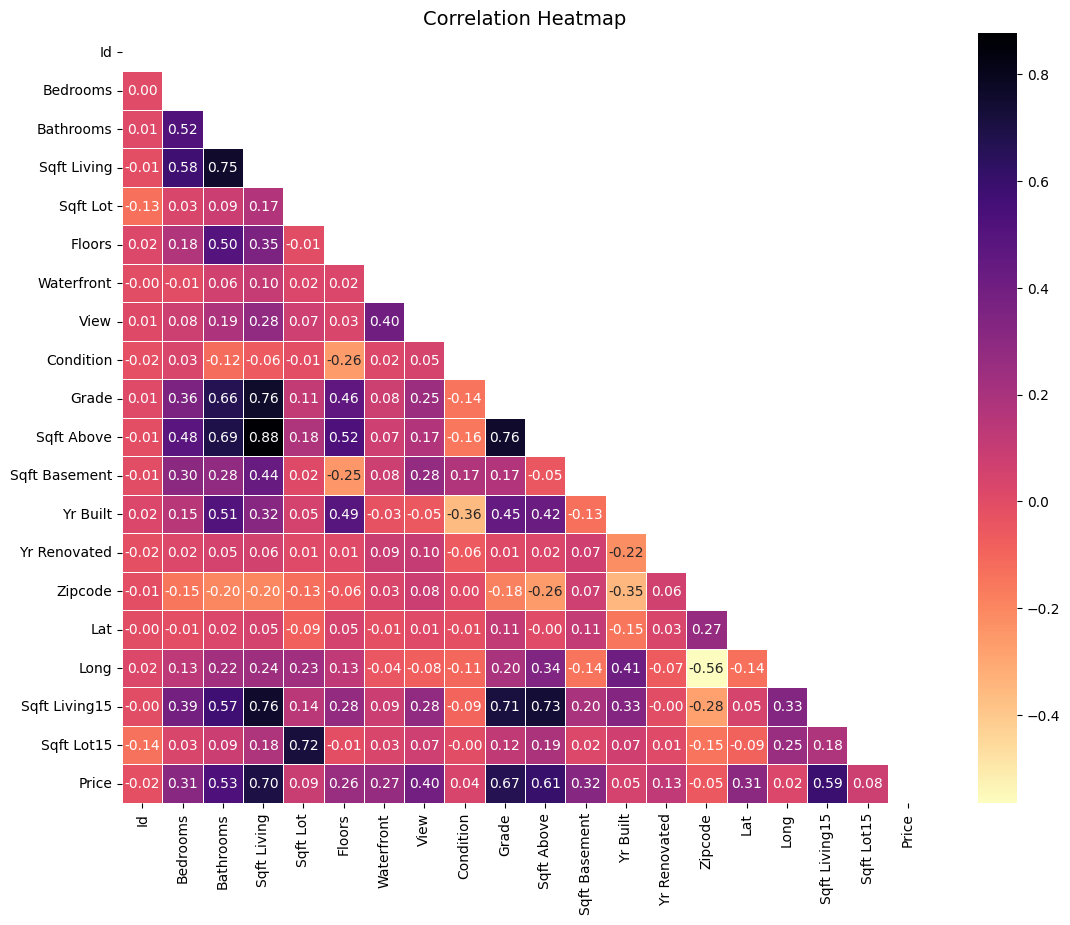

In [38]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, 
                cmap="magma_r", 
                linewidths=0.5, 
                annot=True, 
                fmt=".2f",
                xticklabels=[col.replace('_', ' ').title() for col in df.columns],
                yticklabels=[col.replace('_', ' ').title() for col in df.columns], 
                mask=mask
                )
plt.title("Correlation Heatmap", fontsize=14)

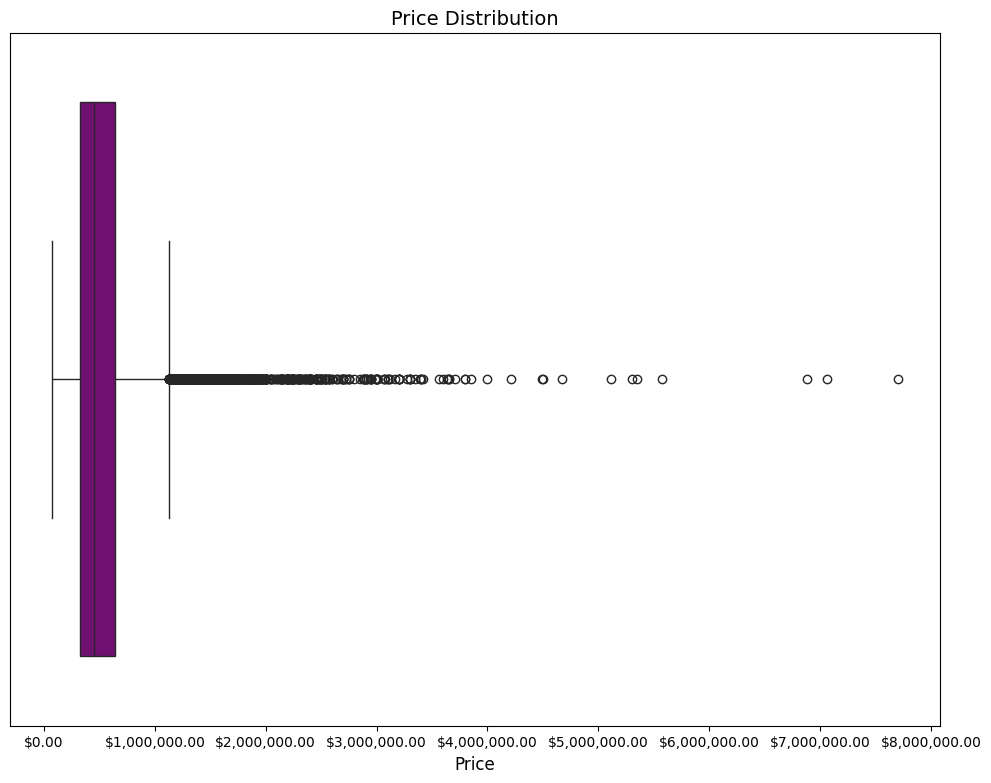

In [39]:
from matplotlib.ticker import FuncFormatter

def currency_formatter(x, pos):
    '''
    Custom formatter function to display y-axis values,
    formatted as currency with comma separators.

    Parameters:
    - x (float): The numerical value to format.
    - pos (int): The tick position (required for matplotlib formatters).

    Returns:
    - str: Formatted string representation of the value.
    '''
    return f'${x:,.2f}'

plt.figure(figsize=(12, 9))
sns.boxplot(x=df["price"], color="purple")
plt.title("Price Distribution", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.yticks([])
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

In [40]:
# Remove outliers using IQR method
df_copy = df.copy()
Q1 = df_copy['price'].quantile(0.25)
Q3 = df_copy['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_without_outliers = df_copy[(df_copy['price'] >= lower_bound) & (df_copy['price'] <= upper_bound)]
ch.check(df_without_outliers)

Number of columns: 20 and rows: 20467

Data types:
id                 int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

Unique values count:
id               20297
bedrooms            13
bathrooms           26
sqft_living        899
sqft_lot          9274
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         840
sqft_basement      271
yr_built           116
yr_renovated        70
zipcode             70
lat               5017
long               750
sqft_living15      722

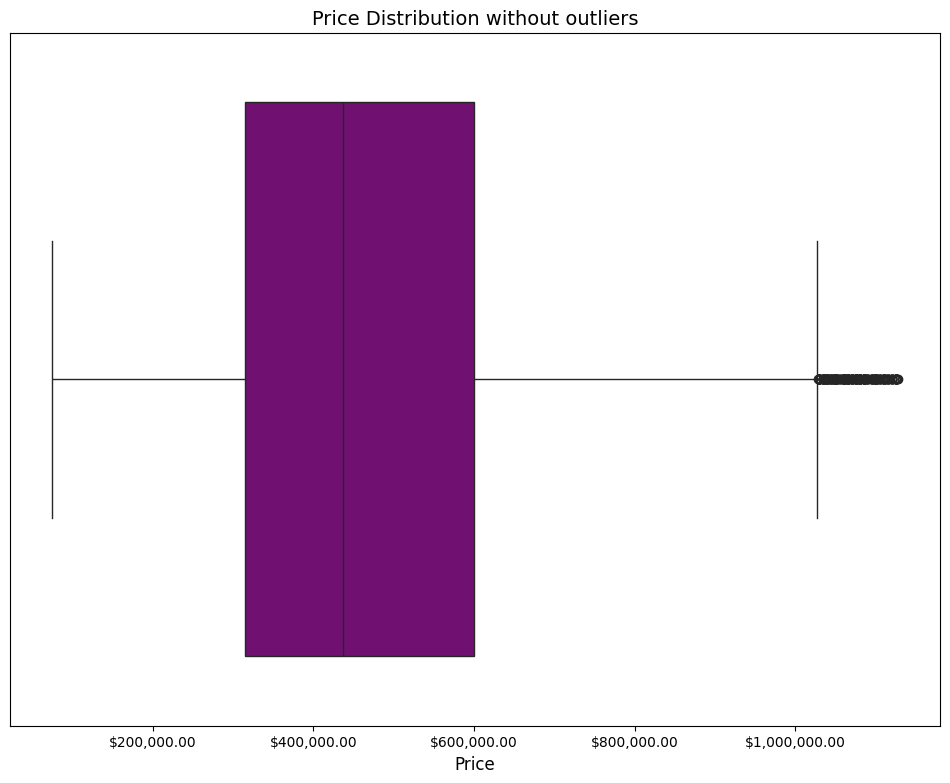

In [41]:
plt.figure(figsize=(12, 9))
sns.boxplot(x=df_without_outliers["price"], color="purple")
plt.title("Price Distribution without outliers", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.yticks([])
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.show()

In [43]:
correlated_columns = correlation_with_price[correlation_with_price >= 0.25].index.tolist()
correlated_columns = [col for col in correlated_columns if col != 'price']
print(correlated_columns)

['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']


In [44]:
X = df[correlated_columns]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 61218069416.615845
R² Score: 0.5950562192898906
